In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Combined_Data = pd.read_csv("Resources/Cleaned CSVs/Combined_Data.csv")
Combined_Data.set_index('Tm', inplace=True)

In [3]:
corr_data = Combined_Data.corr()['playoffs']

low_corr_df = pd.DataFrame(corr_data.loc[(corr_data <= 0.1) & (corr_data >= -0.1)])
low_corr_df.rename(columns={'playoffs': 'correlation'}, inplace=True)

index_values = low_corr_df.index.tolist()

index_values

['BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho']

In [4]:
columns_to_keep = ['BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho', 'playoffs']

focused_df = Combined_Data[columns_to_keep]

focused_df

,BK,CG_y,Ch,GF,SB,cSho,playoffs
Tm,,,,,,,
Arizona Diamondbacks,5.0,2.0,6150.0,160.0,79.0,1.0,0
Atlanta Braves,8.0,2.0,5889.0,160.0,90.0,1.0,1
Baltimore Orioles,8.0,2.0,5934.0,160.0,81.0,0.0,0
Boston Red Sox,3.0,2.0,5819.0,160.0,125.0,0.0,1
Chicago Cubs,3.0,1.0,6208.0,162.0,66.0,0.0,1
...,...,...,...,...,...,...,...
St. Louis Cardinals,7.0,0.0,5944.0,162.0,101.0,0.0,0
Tampa Bay Rays,1.0,0.0,5802.0,162.0,160.0,0.0,1
Texas Rangers,4.0,3.0,5789.0,159.0,79.0,1.0,1


In [5]:
# Define features set
X = focused_df.copy()
X.drop("playoffs", axis=1, inplace=True)
X

,BK,CG_y,Ch,GF,SB,cSho
Tm,,,,,,
Arizona Diamondbacks,5.0,2.0,6150.0,160.0,79.0,1.0
Atlanta Braves,8.0,2.0,5889.0,160.0,90.0,1.0
Baltimore Orioles,8.0,2.0,5934.0,160.0,81.0,0.0
Boston Red Sox,3.0,2.0,5819.0,160.0,125.0,0.0
Chicago Cubs,3.0,1.0,6208.0,162.0,66.0,0.0
...,...,...,...,...,...,...
St. Louis Cardinals,7.0,0.0,5944.0,162.0,101.0,0.0
Tampa Bay Rays,1.0,0.0,5802.0,162.0,160.0,0.0
Texas Rangers,4.0,3.0,5789.0,159.0,79.0,1.0


In [6]:
# Define target vector
y = Combined_Data["playoffs"].ravel()
y[:5]

array([0, 1, 0, 1, 1])

In [7]:
print(X.shape)
print(y.shape)

(150, 6)
(150,)


In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [12]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [13]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [14]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,22,4
Actual 1,6,6


Accuracy Score : 0.7368421052631579
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.60      0.50      0.55        12

    accuracy                           0.74        38
   macro avg       0.69      0.67      0.68        38
weighted avg       0.73      0.74      0.73        38



## Feature Importance

In [17]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
feature_importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

feature_importances

[(0.3061288337784366, 'Ch'),
 (0.2791275387977223, 'SB'),
 (0.16834131106244343, 'BK'),
 (0.1016392044281323, 'GF'),
 (0.07625284693592896, 'CG_y'),
 (0.06851026499733644, 'cSho')]

In [32]:
feature_importances_df= pd.DataFrame(feature_importances)

feature_importances_df.rename(columns={0: 'importance%'}, inplace=True)
feature_importances_df.rename(columns={1: 'stat'}, inplace=True)

feature_importances_df.set_index('stat', inplace=True)

feature_importances_df

,importance%
stat,
Ch,0.306129
SB,0.279128
BK,0.168341
GF,0.101639
CG_y,0.076253
cSho,0.068510


<Axes: title={'center': 'Most Important Stats'}>

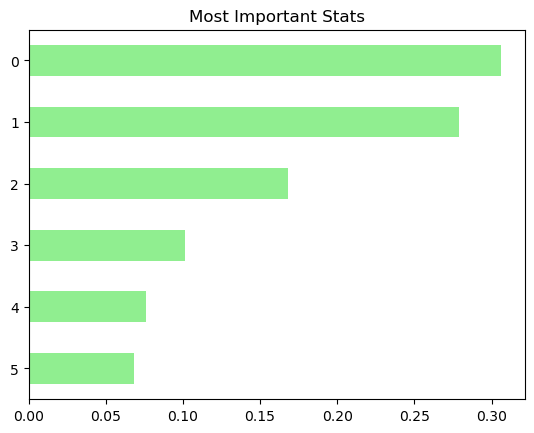

In [35]:
# Visualize the features by importance

importances_sorted = df_reordered.sort_values(by='importance%')

importances_sorted.plot(kind='barh', color='lightgreen', title= 'Most Important Stats', ylabel='', legend=False)